# <font color="#CE4A06">K Nearest Neighbors (KNN) With 'Iris' Dataset</font>

We'll use the iris dataset for this lesson. It's a small dataset with flower features that can be used to attempt to predict the species of an iris flower.

This 'iris' dataset perhaps the best known database to be found in the pattern recognition literature. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

KNN นั้นเป็นวิธีการที่ Old School กล่าวคือตัวงานที่จะได้ใช้ KNN นั้นจะจบที่ว่ามีวิธียุคใหม่ที่ดีกว่า ในแง่ของการ Train Model
แต่ถ้าเป็นในมุมที่เราจะเอามาใช้ในการเติมข้อมูล (Imputation) หรือการจัดการกับ Missing Data ตัว KNN จะเหมาะในการใช้งานมากๆ

**Attribute Information:**  
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. Class (iris species):
   - Iris Setosa
   - Iris Versicolour
   - Iris Virginica

![iris](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/iris.png)

&nbsp;  
<font color="#275bb0">**Read Dataset**</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_iris = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/iris.csv")
df_iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


&nbsp;  
<font color="#275bb0">**Adjust data type**</font>

In [3]:
df_iris = df_iris.astype({
    'Class': 'category',
})
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal-length  150 non-null    float64 
 1   sepal-width   150 non-null    float64 
 2   petal-length  150 non-null    float64 
 3   petal-width   150 non-null    float64 
 4   Class         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


&nbsp;  
<font color="#275bb0">**EDA**</font>

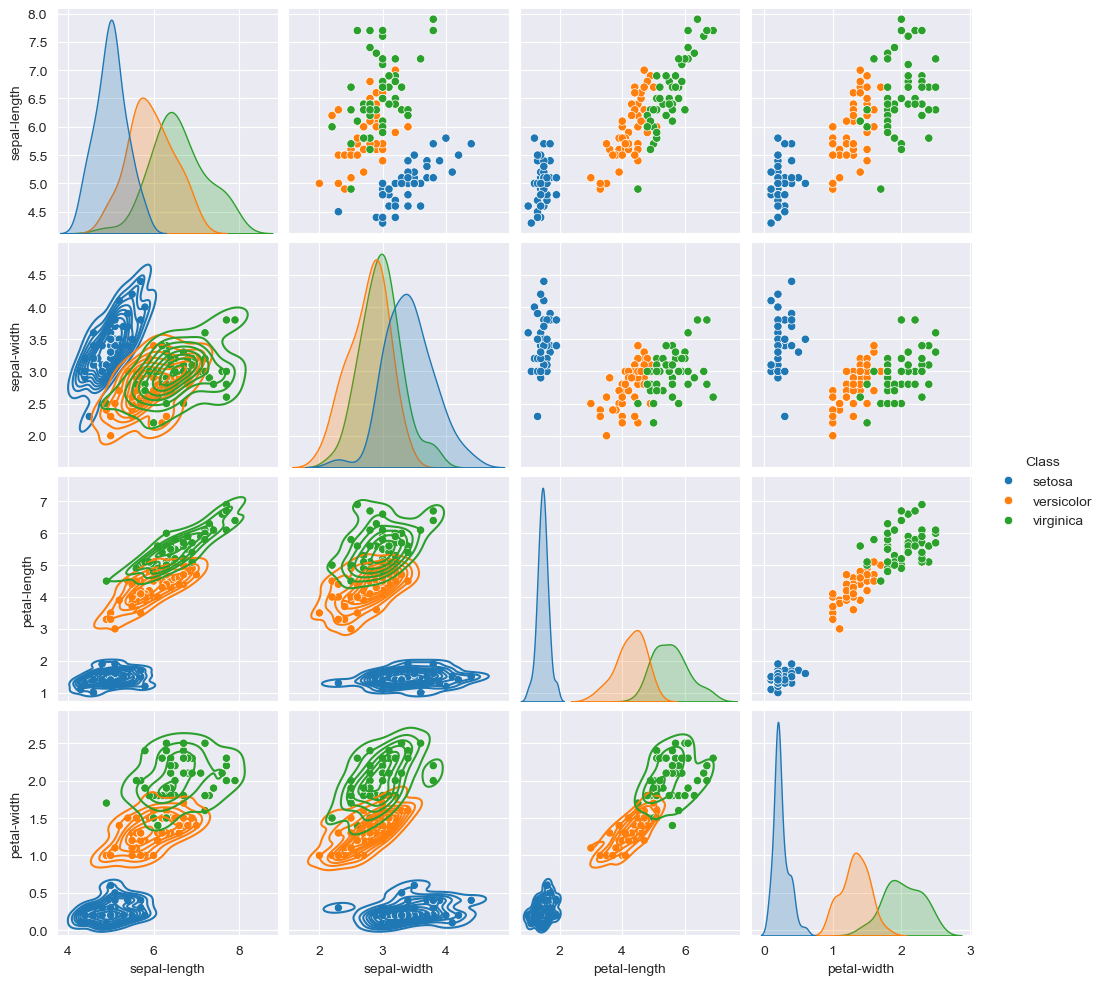

In [4]:
g = sns.pairplot(data=df_iris,
             hue='Class',)
g.map_lower(sns.kdeplot)

\
*For demonstration, we will use **only petal-length and sepal-length** data.*

In [5]:
df_iris = df_iris.filter(['petal-length', 'sepal-length', 'Class'])

<Axes: xlabel='petal-length', ylabel='sepal-length'>

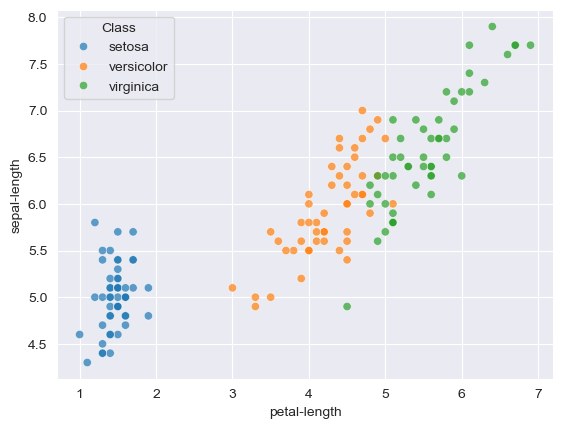

In [6]:
sns.scatterplot(data=df_iris,
                x='petal-length',
                y='sepal-length',
                hue='Class',
                alpha=.7)

&nbsp;
<font color="#275bb0">**Separate dataset into feature/variable and outcome/label data**</font>

X: features/variable data  
y: outcome/label data

In [7]:
X = df_iris.loc[:,~(df_iris.columns=='Class')] # or X = df_iris.iloc[:, :-1], if 'Class' is the last column
                                               # or X = df_iris[['petal-length', 'sepal-length']]
X

,petal-length,sepal-length
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0
...,...,...
145,5.2,6.7
146,5.0,6.3
147,5.2,6.5
148,5.4,6.2


In [8]:
y = df_iris['Class']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Class, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [9]:
y.value_counts()

Class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

ในกรณีที่ Count ไม่ได้เท่ากันแบบนี้ (Imbalance) หรือแบบว่างห่างกันเว่อร์ๆ เช่น A = 25 และ B = 1000 เราจะมี 2 แนวทางในการปรับให้เท่ากัน
1. Over Sampling: เราจะสร้าง Data เพิ่มให้กับพวกตัวที่มีน้อย ในตัวอย่างนี้ก็จะเป็นการสร้าง A เพิ่มอีก 975 ตัว
2. Under Sampling: เราจะลบ Data ตัวที่มากให้เหลือเท่ากับตัวที่น้อยทที่สุด ในตัวอย่างนี้จะเป็นการลบ B อีก 975 ตัว

ทีนี้ทั้งคู่ก็จะมี Data ที่เท่ากัน

โดยส่วนมากแล้ว เราจะะใช้ **Over Sampling** มากกว่า เพราะว่าการสร้างเพิ่มเราอ้างอิงจาก Data 25 ตัวที่มีอยุ่
แต่ว่าการ **Under Sampling** เราจะคัดมาแค่ 25 ตัว จาก 1000 ซึ่งเราไม่อาจมั่นใจได้เลยว่า 25  ที่หยิบมามันคือตัวที่ดีจริงหรือเปล่า

&nbsp;  
<font color="#275bb0">**Train-test split**</font>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1234)

In [11]:
X_train.shape

(105, 2)

In [12]:
X_test.shape

(45, 2)

In [13]:
y_train.value_counts()

Class
virginica     38
setosa        34
versicolor    33
Name: count, dtype: int64

In [14]:
y_test.value_counts()

Class
versicolor    17
setosa        16
virginica     12
Name: count, dtype: int64

&nbsp;  
<font color="#275bb0">**Visualize train & test sets**</font>

Here the 'triangle' markers are from the training set and 'plus' markers are from the test set.

<Axes: xlabel='petal-length', ylabel='sepal-length'>

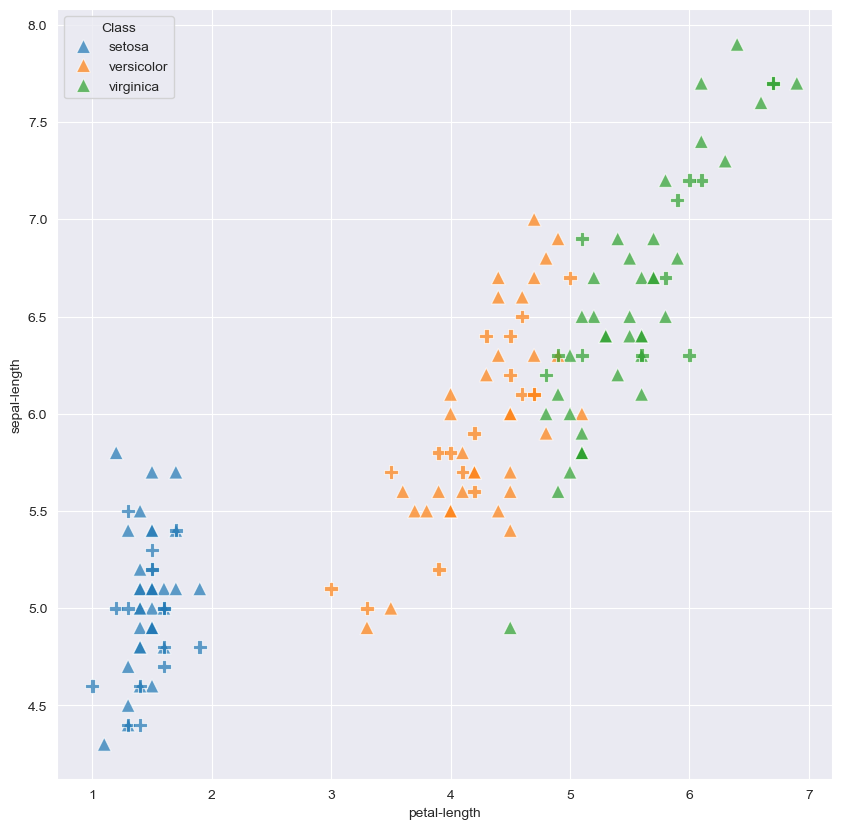

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

#Training set: triangle
sns.scatterplot(data=X_train,
                x='petal-length',
                y='sepal-length',
                hue=y_train,
                marker= '^',
                s=100,
                alpha=.7,
                ax=ax)

#Test set: plus
sns.scatterplot(data=X_test,
                x='petal-length',
                y='sepal-length',
                hue=y_test,
                marker= 'P',
                alpha=.7,
                s=100,
                legend=False,
                ax=ax)

#matplotlib marker style: https://matplotlib.org/stable/api/markers_api.html

&nbsp;   
<font color="#275bb0">**Feature data scaling**</font>

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
  
The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.  

\
Note that, since all features in the iris dataset are in the same scale, the scaling process is in fact unnecessary.

In [16]:
df_iris

,petal-length,sepal-length,Class
0,1.4,5.1,setosa
1,1.4,4.9,setosa
2,1.3,4.7,setosa
3,1.5,4.6,setosa
4,1.4,5.0,setosa
...,...,...,...
145,5.2,6.7,virginica
146,5.0,6.3,virginica
147,5.2,6.5,virginica
148,5.4,6.2,virginica


In [17]:
df_iris.std(numeric_only=True)

petal-length    1.764420
sepal-length    0.828066
dtype: float64

\
However,  it is a good practice to scale the features so that all of them can be uniformly evaluated.  
The following script performs feature data scaling:

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #Scaling parameters must based on training data.

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

\
Note that transform() returns a numpy array. To make further analysis easier, we will convert it back to pandas dataframe.

In [19]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [20]:
X_train_sc

,petal-length,sepal-length
0,-1.326926,-1.191916
1,0.735483,-0.075602
2,0.792773,1.040711
3,1.308375,2.281059
4,1.021929,1.040711
...,...,...
100,1.193796,1.164746
101,0.964640,0.792642
102,0.105303,-0.447707
103,-1.441504,-1.812090


In [21]:
X_train_sc.std(numeric_only=True)

petal-length    1.004796
sepal-length    1.004796
dtype: float64

In [22]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [23]:
X_test_sc.std(numeric_only=True)

petal-length    1.032011
sepal-length    1.087273
dtype: float64

&nbsp;   
<font color="#275bb0">**Training and predictions**</font>

It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [24]:
from sklearn.neighbors import KNeighborsClassifier as knn
model = knn(n_neighbors=3) # n_neighbors = value for K-neighbors
model.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

\
The next step is to make predictions on our test data. To do so, execute the following script:

In [25]:
y_pred = model.predict(X_test_sc)
y_pred

array(['versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica'], dtype=object)

&nbsp;   
<font color="#275bb0">**Visualize model predictions**</font>

We can visualize the predicted boundaries for classes by perform prediction on a simulated test set.

In [26]:
X_simu = {}
X_simu['petal-length'] = []
X_simu['sepal-length'] = []

#simulated petal-length
max_petl = max(max(X_train_sc['petal-length']), max(X_test_sc['petal-length']))
min_petl = min(min(X_train_sc['petal-length']), min(X_test_sc['petal-length']))
petl = np.linspace(min_petl, max_petl, 100)

#simulated sepal-length
max_sepl = max(max(X_train_sc['sepal-length']), max(X_test_sc['sepal-length']))
min_sepl = min(min(X_train_sc['sepal-length']), min(X_test_sc['sepal-length']))
sepl = np.linspace(min_sepl, max_sepl, 100)

for p in petl:
    for s in sepl:
        X_simu['petal-length'].append(p)
        X_simu['sepal-length'].append(s)

X_simu = pd.DataFrame(X_simu)
X_simu

,petal-length,sepal-length
0,-1.613371,-1.936124
1,-1.613371,-1.891021
2,-1.613371,-1.845917
3,-1.613371,-1.800814
4,-1.613371,-1.755710
...,...,...
9995,1.766688,2.348715
9996,1.766688,2.393818
9997,1.766688,2.438922
9998,1.766688,2.484025


\
Perform prediction on a simulated test set:

In [27]:
y_pred_simu = model.predict(X_simu)

\
Visualize model prediction:

Text(0.5, 1.0, "'o' for correct prediction, 'x' for incorrect prediction")

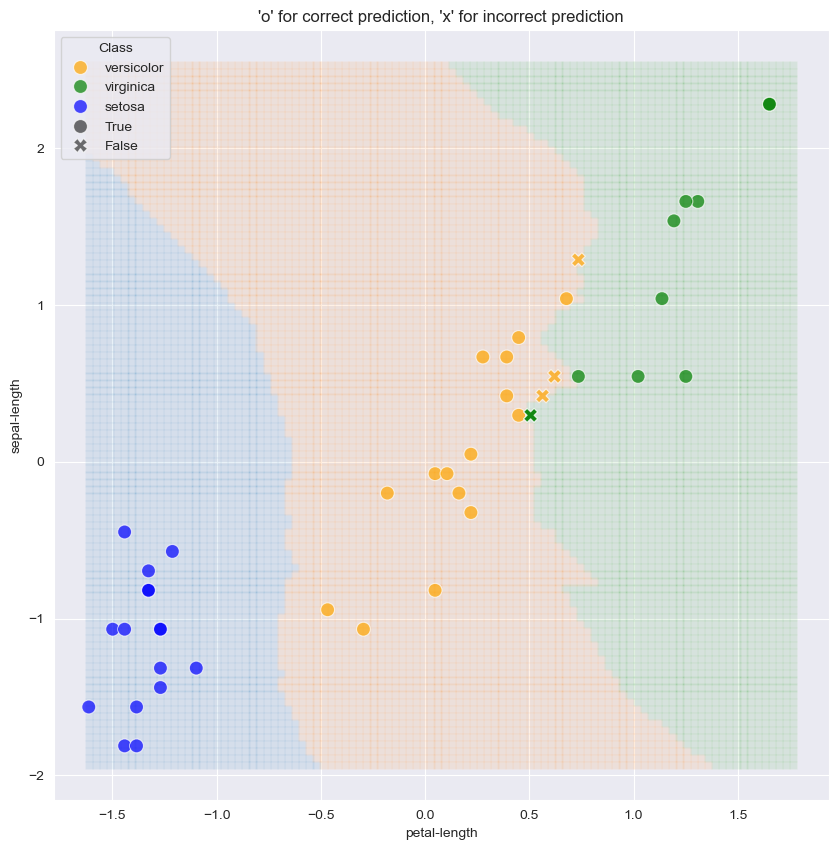

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_simu,
                x='petal-length',
                y='sepal-length',
                hue=y_pred_simu,
                marker= 's',
                legend=False,
                alpha=.1,
                ax=ax)

correct_pred = (y_pred==y_test)

sns.scatterplot(data=X_test_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_pred,
                palette=["orange", "g", "b"],
                style=correct_pred.reset_index(drop=True),
                style_order=[True, False],
                s=100,
                alpha=.7,
                ax=ax)
plt.title("'o' for correct prediction, 'x' for incorrect prediction")

&nbsp;   
<font color="#275bb0">**Model performance evaluation**</font>

For evaluating a predictive model performance, confusion matrix, precision, recall and f1 score are the most commonly used metrics.  
The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.  
Take a look at the following script:

In [29]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred, labels=['virginica','setosa','versicolor'])
print(conf_mat)

[[ 9  0  3]
 [ 0 16  0]
 [ 2  0 15]]


\
Form the print result, it is difficult to know what is the class of each row. It is better to use ConfusionMatrixDisplay() to visualize a confusion matrix.

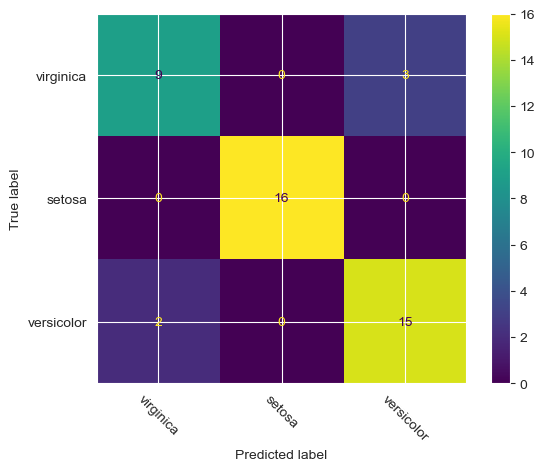

In [30]:
(metrics.ConfusionMatrixDisplay(conf_mat,
                               display_labels=['virginica','setosa','versicolor'])
 .plot(xticks_rotation=-45))

# แกน X คือสิ่งที่ Predict
# แกน Y คือสิ่งที่เป็นจริงๆ

We can also use seaborn heatmap to visualize a confusion matrix. However, we need to modify labels manually.

\
The classification_report() can be used to show precision, recall and f1 score.

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.83      0.88      0.86        17
   virginica       0.82      0.75      0.78        12

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



In [55]:
precision_avg = (1.00+0.83+0.82)/3
print(f"precision macro average: {precision_avg}")

# Precision x Current_Support / Total_Support
precision_weight_avg = (1.0*16/45)+(0.83*17/45)+(0.82*12/45)
print(f"precision weight average: {precision_weight_avg}")

precision macro average: 0.8833333333333333
precision weight average: 0.8877777777777778


Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

Macro ใช้เมื่อ Data Balance
Weight ใช้เมื่อ Data Imbalance

FYI, https://en.wikipedia.org/wiki/Confusion_matrix

\
To get a single score:

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.8888888888888888

In [33]:
metrics.recall_score(y_test, y_pred, average=None)

array([1.        , 0.88235294, 0.75      ])

In [34]:
metrics.recall_score(y_test, y_pred, average='weighted')

0.8888888888888888

None: the scores for each class are returned.  
'micro': Calculate metrics globally by considering each element of the label indicator matrix as a label.  
'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.  
'weighted': Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).  

In [35]:
metrics.f1_score(y_test, y_pred, average=None)

array([1.        , 0.85714286, 0.7826087 ])

In [36]:
metrics.f1_score(y_test, y_pred, average='micro')

0.8888888888888888

In [37]:
metrics.f1_score(y_test, y_pred, average='macro')

0.8799171842650103

In [38]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.8880607315389923

\
We can visualize the incorrectly predicted data points.

<Axes: xlabel='petal-length', ylabel='sepal-length'>

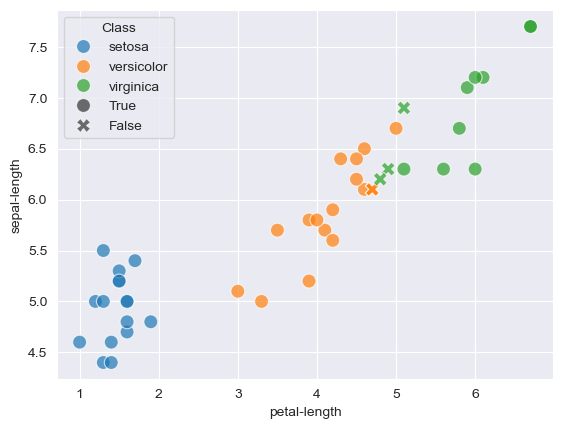

In [39]:
correct_pred = (y_test==y_pred)

sns.scatterplot(data=X_test,
                x='petal-length',
                y='sepal-length',
                hue=y_test,
                s=100,
                alpha=.7,
                style=correct_pred,
                style_order=[True, False]
                )

\
Note that there are two points that have the same petal-length and sepal-length values.  
These points are predicted as versicolor but actually they are virginica.

In [40]:
X_test[~correct_pred]

,petal-length,sepal-length
63,4.7,6.1
73,4.7,6.1
123,4.9,6.3
126,4.8,6.2
141,5.1,6.9


&nbsp;    
<font color="#275bb0">**Optimize number of neighbors (K)**</font>

\
We can tune a KNN model using a simple loop:

\
Set the range of K for optimization:

In [41]:
Ks = np.arange(1,31,1)
Ks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

\
Collect performance scores:

In [42]:
scores = {}
scores['K'] = []
scores['accuracy'] = []
scores['precision_w'] = []
scores['recall_w'] = []
scores['f1_w'] = []


for k in Ks:
    model = knn(n_neighbors=k) # n_neighbors = value for K-neighbors
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    scores['K'].append(k)
    scores['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    scores['precision_w'].append(metrics.precision_score(y_test, y_pred, average='weighted'))
    scores['recall_w'].append(metrics.recall_score(y_test, y_pred, average='weighted'))
    scores['f1_w'].append(metrics.f1_score(y_test, y_pred, average='weighted'))

scores = pd.DataFrame(scores)
scores.sort_values(by='accuracy', ascending=False).head(10)

,K,accuracy,precision_w,recall_w,f1_w
6,7,0.977778,0.979012,0.977778,0.977612
11,12,0.977778,0.979012,0.977778,0.977612
13,14,0.955556,0.955556,0.955556,0.955556
18,19,0.955556,0.958572,0.955556,0.954948
16,17,0.955556,0.958572,0.955556,0.954948
19,20,0.955556,0.958572,0.955556,0.954948
14,15,0.955556,0.955556,0.955556,0.955556
12,13,0.955556,0.955556,0.955556,0.955556
10,11,0.955556,0.955556,0.955556,0.955556
9,10,0.955556,0.955556,0.955556,0.955556


\
Plot performance scores:

In [43]:
df_forPlot = pd.melt(scores,
                     value_vars = ['accuracy', 'precision_w', 'recall_w', 'f1_w'],
                     id_vars = ['K'],
                     var_name = 'Metric',
                     value_name = 'Score')
df_forPlot.head()

,K,Metric,Score
0,1,accuracy,0.866667
1,2,accuracy,0.866667
2,3,accuracy,0.888889
3,4,accuracy,0.933333
4,5,accuracy,0.933333


In [44]:
df_forPlot[df_forPlot.K==7]

,K,Metric,Score
6,7,accuracy,0.977778
36,7,precision_w,0.979012
66,7,recall_w,0.977778
96,7,f1_w,0.977612


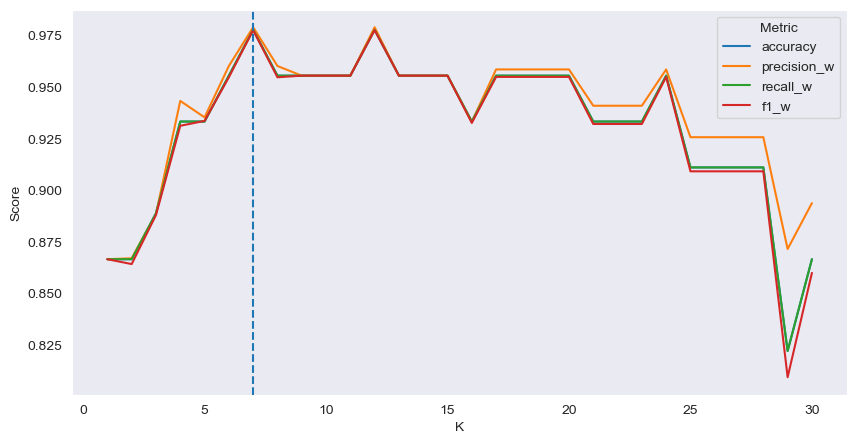

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_forPlot,
             x = 'K',
             y = 'Score',
             hue = 'Metric',
             ax=ax)
plt.grid()
plt.axvline(x=7, ls="--")

&nbsp;   
<font color="#275bb0">**Visualize model prediction at K=1, 10, 50**</font>

- K = 1
K ยิ่งน้อย ยิ่งคำนวณไว แต่แลกมากับที่ Model ของเราจะมี Bias  แน่นอนเนื่องจากว่า K มีน้อยเกินไป

Text(0.5, 1.0, 'K=1')

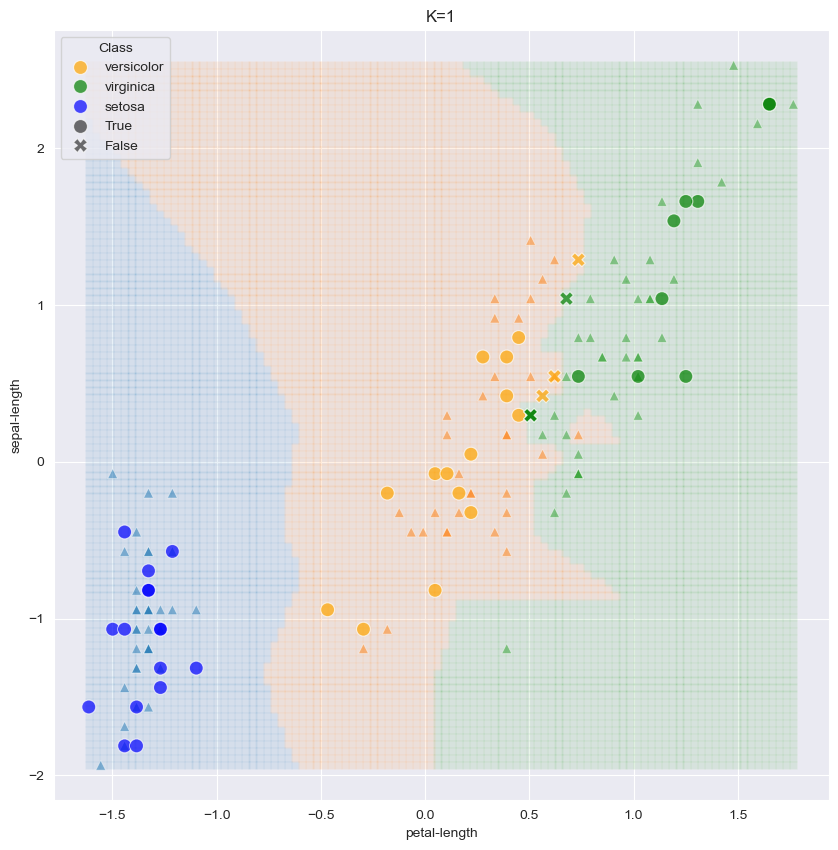

In [46]:
model = knn(n_neighbors=1)
model.fit(X_train_sc, y_train)
y_pred_simu = model.predict(X_simu)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_simu,
                x='petal-length',
                y='sepal-length',
                hue=y_pred_simu,
                marker= 's',
                alpha=.1,
                legend=False,
                ax=ax)

sns.scatterplot(data=X_train_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_train.reset_index(drop=True),
                marker= '^',
                s=50,
                alpha=.5,
                legend=False,
                ax=ax)

y_pred = model.predict(X_test_sc)
correct = (y_pred==y_test)

sns.scatterplot(data=X_test_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_pred,
                style=correct.reset_index(drop=True),
                style_order=[True, False],
                palette=["orange", "g", "b"],
                s=100,
                alpha=.7,
                ax=ax)
plt.title("K=1")

- K = 10

Text(0.5, 1.0, 'K=10')

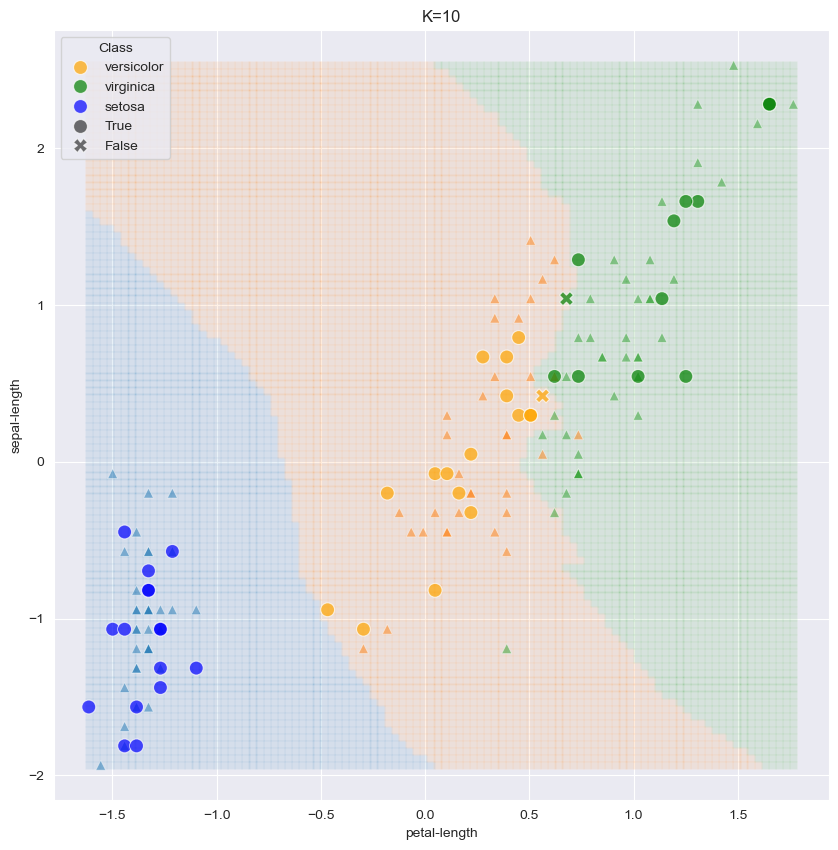

In [47]:
model = knn(n_neighbors=10)
model.fit(X_train_sc, y_train)
y_pred_simu = model.predict(X_simu)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_simu,
                x='petal-length',
                y='sepal-length',
                hue=y_pred_simu,
                marker= 's',
                alpha=.1,
                legend=False,
                ax=ax)

sns.scatterplot(data=X_train_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_train.reset_index(drop=True),
                marker= '^',
                s=50,
                alpha=.5,
                legend=False,
                ax=ax)

y_pred = model.predict(X_test_sc)
correct = (y_pred==y_test)

sns.scatterplot(data=X_test_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_pred,
                style=correct.reset_index(drop=True),
                style_order=[True, False],
                palette=["orange", "g", "b"],
                s=100,
                alpha=.7,
                ax=ax)
plt.title("K=10")

- K = 50

Text(0.5, 1.0, 'K=50')

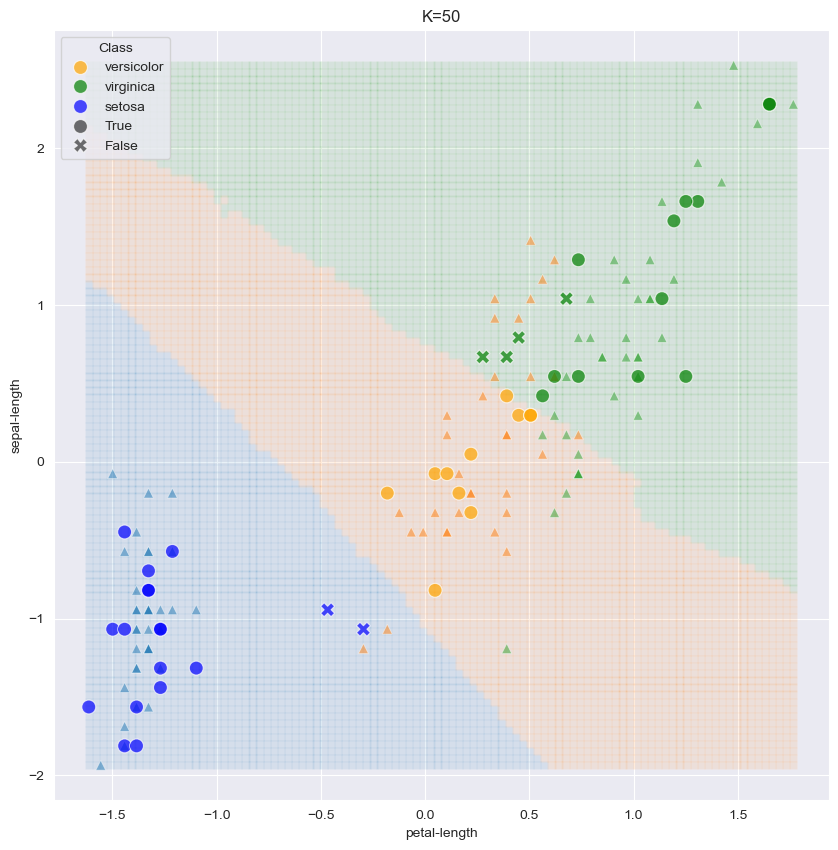

In [48]:
model = knn(n_neighbors=50)
model.fit(X_train_sc, y_train)
y_pred_simu = model.predict(X_simu)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_simu,
                x='petal-length',
                y='sepal-length',
                hue=y_pred_simu,
                marker= 's',
                alpha=.1,
                legend=False,
                ax=ax)

sns.scatterplot(data=X_train_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_train.reset_index(drop=True),
                marker= '^',
                s=50,
                alpha=.5,
                legend=False,
                ax=ax)

y_pred = model.predict(X_test_sc)
correct = (y_pred==y_test)

sns.scatterplot(data=X_test_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_pred,
                style=correct.reset_index(drop=True),
                style_order=[True, False],
                palette=["orange", "g", "b"],
                s=100,
                alpha=.7,
                ax=ax)
plt.title("K=50")

Text(0.5, 1.0, 'K=7')

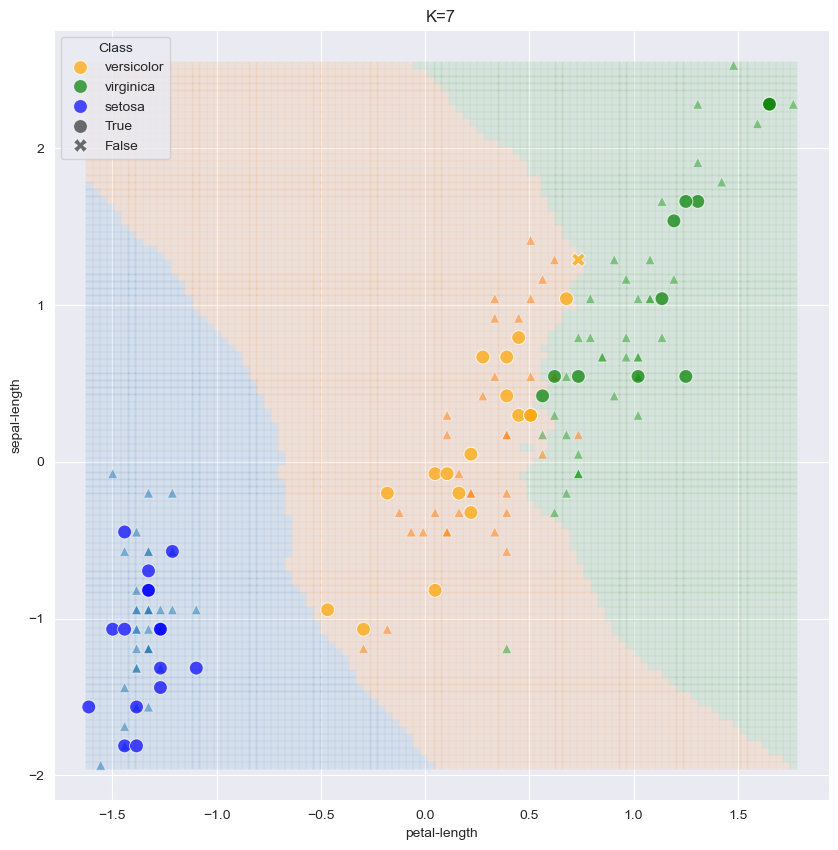

In [49]:
model = knn(n_neighbors=7)
model.fit(X_train_sc, y_train)
y_pred_simu = model.predict(X_simu)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_simu,
                x='petal-length',
                y='sepal-length',
                hue=y_pred_simu,
                marker= 's',
                alpha=.1,
                legend=False,
                ax=ax)

sns.scatterplot(data=X_train_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_train.reset_index(drop=True),
                marker= '^',
                s=50,
                alpha=.5,
                legend=False,
                ax=ax)

y_pred = model.predict(X_test_sc)
correct = (y_pred==y_test)

sns.scatterplot(data=X_test_sc,
                x='petal-length',
                y='sepal-length',
                hue=y_pred,
                style=correct.reset_index(drop=True),
                style_order=[True, False],
                palette=["orange", "g", "b"],
                s=100,
                alpha=.7,
                ax=ax)
plt.title("K=7")

&nbsp;

การเลือก K ที่เหมาะสมจะอยู่ในบท CV (บทถัดไป)
ในบททนี้ไม่ได้พูดถึงเรื่อง Distance แต่เราสามารถปรับแต่ง Distance ได้ (ในบทนี้จะใช้ default หมดคือ Eucidean)
แต่โดยพื้นฐานการใช้ KNN ตัว Metric Distance จะมีให้เลือก 3 อัน
- Eucidean (p=2)
- Manhatan (p=1)
- Minkowski (p=?)

ทั้งหมดที่ระบุมานั้นตัว Library ทำให้ สาเหตุที่ p=2 ใช้ Eucidean ก็เพราะว่าสูตรคำนวณมันต้องการหา 1/2 และใช้ sqrt
หรืออย่างที่ใช้เป็น Manhattan ตอน p = 1 ก็เพราะว่ามันมี Absolute (เจ้าตัวที่มันจะเปลี่ยนติดลบให้เป็นบวก)
สุดท้าย Minovski ในสูตรมันเอา p มาใช้คำนวณ ซึ่งมันหลากหลาย พอ P ระบุเป็นค่าอื่นที่ไม่ใช่ 1 2 มันก็เลยจะหนีไปใช้ Minovski หมด